<a href="https://colab.research.google.com/github/Daisuke0209/sparse_modeling/blob/master/190422_matching_pursuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# l0最適化問題に対する貪欲法アプローチ

##ライブラリのインポート

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## マッチング追跡関数の定義

In [0]:
def MP(y,Phi,EPS,MAX_ITER):
  m=Phi.shape[0]
  n=Phi.shape[1]
  x=np.zeros(n)
  r=y
  k=0
  Phi_norm=np.diag(np.dot(Phi.T,Phi))
  while (np.linalg.norm(r)>EPS)&(k<MAX_ITER):
    v=np.dot(Phi.T,r)/np.sqrt(Phi_norm)
    ik=np.argmax(np.abs(v))
    z=np.dot(Phi[:,ik],r)/Phi_norm[ik]
    x[ik]=x[ik]+z
    r=r-np.dot(z,Phi[:,ik])
    k=k+1
  return x,k,np.linalg.norm(r)

## 直交マッチング追跡関数の定義

In [0]:
def OMP(y,Phi,EPS,MAX_ITER):
  m=Phi.shape[0]
  n=Phi.shape[1]
  x=np.zeros(n)
  r=y
  k=0
  S=np.zeros(n)
  Phi_norm=np.diag(np.dot(Phi.T,Phi))
  s=[]
  while (np.linalg.norm(r)>EPS)&(k<MAX_ITER):
    v=np.dot(Phi.T,r)/np.sqrt(Phi_norm)
    ik=np.argmax(np.abs(v))
    s.append(ik)
    Phi_S = Phi[:,s]
    a=np.dot(Phi_S.T,Phi_S)
    if len(a)==1:
      x[s]=np.dot(Phi_S.T,y)/a
    else:
      b=np.dot(np.linalg.inv(a),Phi_S.T)
      x[s]=np.dot(b,y)
    r=y-np.dot(Phi,x)
    k=k+1
  return x,k,np.linalg.norm(r)

## パラメータ設定

In [0]:
x_orig=[]
x_orig.append(-2)
for i in range(50):
  x_orig.append(0)
x_orig.append(5)
x_orig.append(3)
p=np.poly1d(x_orig)
t=[x/10 for x in range(11)]
y=p(t)
N=len(t)
M=N-1
M_l=len(x_orig)
Phi=np.vander(t,M_l)
EPS=1e-5
MAX_ITER=1000

今回の目的は、以下の多項式を”当てる”こと。
$$y=-2t^{52}+5t+3$$
観測点${\bf t}=(t_i)_{i=1\cdots n}$に対応して、モデルから観測データ${\bf y}=(y_i)_{i=1\cdots n}$が得られたとする。また、前提としてモデルは多項式でかつ、ほとんどの多項式の係数が0である（スパース性）ことを知っているとする。
その状態で、多項式の係数を求めることを目的とする。

In [47]:
t=0.1234
print(p(t))
print(-2*t**52+5*t+3)

3.617
3.617


## マッチング追跡の実行

In [51]:
x,k,r_norm=MP(y,Phi,EPS,MAX_ITER)
print("残差=%.10f"%r_norm)
print(x.round())

残差=0.0888997949
[-2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -0. -0. -1. -1.  3.  4.  3.]


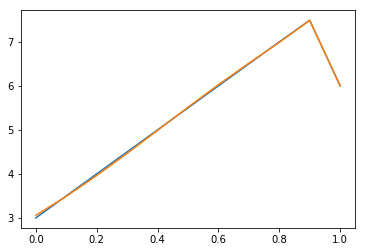

In [52]:
plt.plot(t,y)
plt.plot(t,np.dot(Phi,x))

## 直交マッチング追跡の実行

In [53]:
x,k,r_norm=OMP(y,Phi,EPS,MAX_ITER)
print("残差=%.10f"%r_norm)
print(x.round())

残差=0.0000000000
[-2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  5.  3.]


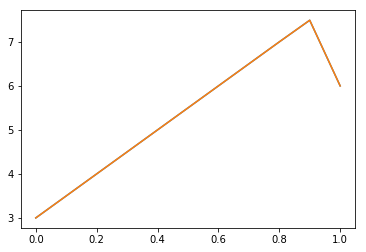

In [54]:
plt.plot(t,y)
plt.plot(t,np.dot(Phi,x))

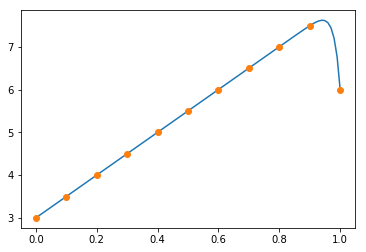

In [65]:
t2=[x/100 for x in range(101)]
y2=p(t2)
plt.plot(t2,y2)
plt.plot(t,y,marker='o',linestyle='None')